In [3]:
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

import warnings
warnings.filterwarnings(action='ignore')

# 한글설정
from matplotlib import font_manager
f_path = '/Library/Fonts/NanumGothic.ttf'
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family = 'NanumGothic')

#지수표현 안나오게 하기
pd.options.display.float_format = '{:.1f}'.format


* 제주도 2차 재난지원금 신청: 8. 24. ~ 10. 11.

"""


* YM : 기준년월 
* SIDO : 지역대분류명 
* SIGUNGU : 지역중분류명 
* FranClass : 소상공인구분 
* Type : 업종명 
* Time : 시간대 
* vTotalSpent : 총사용금액 
* DisSpent : 재난지원금 사용금액 
* NumOfSpent : 총 이용건수 
* NumOfDisSpent : 총 재난지원금 이용건수 
* POINT_X, POINT_Y : X,Y 좌표 


"""


In [4]:
# 파일 불러오기
dfs=[]
file_list = glob('./data/*.txt')
for each_file in file_list:
    df = pd.read_csv(each_file, thousands = ',')
    dfs.append(df)
    
df = pd.concat(dfs)
df.reset_index(drop=True, inplace=True)
df= df.set_index('Field1')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1119429 entries, 1 to 280085
Data columns (total 15 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   OBJECTID       1119429 non-null  int64  
 1   YM             1119429 non-null  int64  
 2   SIDO           1119429 non-null  object 
 3   SIGUNGU        1119429 non-null  object 
 4   FranClass      1119429 non-null  object 
 5   Type           1119429 non-null  object 
 6   Time           1119429 non-null  object 
 7   TotalSpent     1119429 non-null  int64  
 8   DisSpent       1119429 non-null  int64  
 9   NumofSpent     1119429 non-null  int64  
 10  NumofDisSpent  1119429 non-null  int64  
 11  POINT_X        1119429 non-null  float64
 12  POINT_Y        1119429 non-null  float64
 13  X              284265 non-null   float64
 14  Y              284265 non-null   float64
dtypes: float64(4), int64(6), object(5)
memory usage: 136.6+ MB


In [5]:
# 7월에만 있는 X, Y는 없애 줌
df= df.drop(['X', 'Y'], axis=1)
# time의 시는 제거
df['Time']= df['Time'].str.replace('시', '')


In [6]:
df['TS-DS'] = df['TotalSpent']-df['DisSpent']
df['NTS-NDS'] = round(df['NumofSpent']-df['NumofDisSpent'],0)
df['Mts']=round(df['TotalSpent']/df['NumofSpent'],0)
df['Mds']=df['DisSpent']/df['NumofDisSpent']
# # 제주도 인구수 추가
# df['population'] = df['SIGUNGU'].map({'제주시':492072, '서귀포시':181929})


In [7]:
# mds가 nan값은 0이으로 채워줌.
df['Mds']= df['Mds'].fillna(0)

In [8]:
def time_cut(x):
    if '06'> x >='02':
        return '새벽'
    elif '11'> x >= '06':
        return '오전'
    elif '15' > x >= '11':
        return '점심'
    elif '18' > x >= '15':
        return '오후'
    elif  '22'> x >= '18':
        return '저녁'
    else:
        return '심야'

In [9]:
df['Time_cut'] = df['Time'].apply(time_cut)

In [10]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119429 entries, 0 to 1119428
Data columns (total 18 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   OBJECTID       1119429 non-null  int64  
 1   YM             1119429 non-null  int64  
 2   SIDO           1119429 non-null  object 
 3   SIGUNGU        1119429 non-null  object 
 4   FranClass      1119429 non-null  object 
 5   Type           1119429 non-null  object 
 6   Time           1119429 non-null  object 
 7   TotalSpent     1119429 non-null  int64  
 8   DisSpent       1119429 non-null  int64  
 9   NumofSpent     1119429 non-null  int64  
 10  NumofDisSpent  1119429 non-null  int64  
 11  POINT_X        1119429 non-null  float64
 12  POINT_Y        1119429 non-null  float64
 13  TS-DS          1119429 non-null  int64  
 14  NTS-NDS        1119429 non-null  int64  
 15  Mts            1119429 non-null  float64
 16  Mds            1119429 non-null  float64
 17  Time_cut

In [11]:
df.loc[df['Time']=='x', 'Time_cut'] ='무승인거래'

In [31]:
df.to_csv('./dacon_jeju.csv')

In [12]:
df = df.fillna(0)
df.reset_index(drop=True, inplace=True)
df.head(10)

,OBJECTID,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,TS-DS,NTS-NDS,Mts,Mds,Time_cut
0,1,202006,제주특별자치도,제주시,영세,일반한식,00,502000,0,10,0,877006.0,1479766.1,502000,10,50200.0,0.0,심야
1,2,202006,제주특별자치도,제주시,영세,단란주점,00,1520000,0,8,0,877005.7,1479816.0,1520000,8,190000.0,0.0,심야
2,3,202006,제주특별자치도,제주시,중소1,편의점,00,482310,0,35,0,877056.7,1479616.4,482310,35,13780.0,0.0,심야
3,4,202006,제주특별자치도,제주시,영세,편의점,00,38050,5450,3,1,877056.0,1479766.3,32600,2,12683.0,5450.0,심야
4,5,202006,제주특별자치도,제주시,영세,일반한식,00,32000,32000,1,1,877055.5,1479866.3,0,0,32000.0,32000.0,심야
5,6,202006,제주특별자치도,제주시,영세,주점,00,99000,0,1,0,877055.5,1479866.3,99000,1,99000.0,0.0,심야
6,7,202006,제주특별자치도,제주시,영세,스넥,00,155000,80000,4,2,877205.4,1479867.0,75000,2,38750.0,40000.0,심야
7,8,202006,제주특별자치도,제주시,중소1,편의점,00,290360,1150,28,1,877430.7,1485015.7,289210,27,10370.0,1150.0,심야
8,9,202006,제주특별자치도,제주시,영세,스넥,00,102000,0,4,0,877430.4,1485065.7,102000,4,25500.0,0.0,심야
9,10,202006,제주특별자치도,제주시,영세,단란주점,00,600000,0,3,0,877480.2,1485115.9,600000,3,200000.0,0.0,심야


In [13]:
df['Time'].unique()

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', 'x'], dtype=object)

In [14]:
# 재난지원금 사용금액이 없는 수는 824705곳
len(df[df['DisSpent'] == 0])

824705

In [15]:
def point_xy(row):
    a= row['POINT_X']
    b=row['POINT_Y']
    return str(a)+','+str(b)

In [16]:
# 위도경도를 합치고
df['Point_xy'] = df.apply(point_xy, axis=1)

In [17]:
#중복된 위도경도를 확인해보고
df['Point_xy'].value_counts().head(15)

909381.4713000003,1502761.0913999993    1559
909838.7122,1501213.9423999996          1242
909788.2544999998,1501313.6579000002    1208
905047.5815000002,1499791.5336000007    1193
914577.4880999997,1503135.9067000004    1051
913978.9527000001,1502883.135500001     1038
906196.1042,1499996.9618999998          1030
912771.1821999998,1473289.7374000007    1020
906435.4320999999,1502197.1732999997     942
906246.0816999999,1499997.2018           887
909889.4099000003,1501064.2491999997     884
904796.0147,1500140.1762000006           879
909688.2989999996,1501313.1778999993     863
909889.1699,1501114.2268999997           859
909531.6446000001,1502711.8339000007     853
Name: Point_xy, dtype: int64

In [18]:
# 좌표 동이한 곳이 많네..정확한 좌표는 아닌가봄
# 그냥 한번 검색해봄 
df_point_tem = df[df['Point_xy'] == '909381.4713000003,1502761.0913999993']
df_point_tem.groupby(['Type'])[['TotalSpent', 'DisSpent']].sum().sort_values('TotalSpent', ascending=False)

,TotalSpent,DisSpent
Type,,
정장,368044065,63692540
스포츠레져용품,326036461,56254087
스포츠의류,161664880,24375200
내의판매점,149598970,20202770
화장품,91442270,10968910
아동의류,55790750,11392410
악세사리,36287010,4130830
일반한식,35631500,3610895
편의점,26075270,3167600


In [19]:
# 총 재난지원금 이용건수 824780
df[df['NumofDisSpent'] == 0]

# 재난지원금 사용금액은 0이 아닌데 재난지원금 이용건수는 0이다 ??
drop_index = df[(df['NumofDisSpent']==0) & (df['DisSpent']!=0)].index
df.drop(drop_index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [20]:
print(df['SIDO'].unique())
print(df['SIGUNGU'].unique())
print(df['FranClass'].unique())
print(df['Type'].unique())
# print(df['Time'].unique())
# print(df['TotalSpent'].unique())
# print(df['DisSpent'].unique())
# print(df['NumofSpent'].unique())
# print(df['NumofDisSpent'].unique())

#Type은 묶어줘야 할 것 같음
df_type_count = pd.DataFrame(df['Type'].value_counts())

['제주특별자치도']
['제주시' '서귀포시']
['영세' '중소1' '중소' '중소2' '일반']
['일반한식' '단란주점' '편의점' '주점' '스넥' '콘도' '일식회집' '기타음료식품' '기타숙박업' '노래방' '기타잡화'
 '중국음식' '당구장' '서양음식' '슈퍼마켓' '유아원' '유흥주점' '기타레져업' '농축수산품' '골프경기장' '세탁소'
 '위탁급식업' '기타유통업' '문화취미기타' '주유소' '스포츠레져용품' '구내매점' '특급호텔' '볼링장' '신발'
 '기타회원제형태업소' '제과점' '피부미용실' '칵테일바' '골프용품' '사무서비스' 'LPG' '세차장' '영화관' '주차장'
 '종합병원' '사우나' '학원(회원제형태)' '화장품' '헬스크럽' '의원' '2급호텔' '독서실' '주류판매점' '골프연습장'
 '기타대인서비스' '성인용품점' '화물운송' '애완동물' '안마스포츠마사지' '정장' '동물병원' '약국' '상품권'
 '인터넷Mall' '항공사' '레져업소(회원제형태)' '1급호텔' '침구수예점' '악세사리' '보관창고업' '기념품점' '화원'
 '미용원' '종합용역' '목재석재철물' '인터넷종합Mall' '대형할인점' '기타연료' '조명기구' '문구용품' '사진관'
 '자동차정비' '컴퓨터' '조세서비스' '기타의료기관및기기' '유류판매' '기계공구' '보일러펌프' '기타업종' '미곡상'
 '건축요업품' '렌트카' '소프트웨어' '택시' '수영장' '비료농약사료종자' '농축협직영매장' '기타건축자재' '농기계'
 '정육점' '페인트' '스포츠의류' '양품점' '자동차부품' '기타가구' '관광여행' '이용원' '면세점' '종합레져타운'
 '일반서적' '냉열기기' '주방용식기' '인테리어' '민예공예품' '기타농업관련' '캐쥬얼의류' '기타건강식' '기타운송'
 '연쇄점' '옷감직물' '한의원' '여객선' '기타수리서비스' '농협하나로클럽' '기타전기제품' '가전제품' '기타용역서비스'
 '일반가구' '기능학원' '카페트커텐천막' 

In [21]:
df_type_count.loc['면세점']

Type    186
Name: 면세점, dtype: int64

In [22]:
# X시는 뭘까? =미승인 자동결제 4%정도
# X는 빼줘도 되지 않을까
len(df[df['Time']=='x']) / 1119429

0.041976757793482214

In [23]:
df[df['Time']=='x']

,OBJECTID,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,TS-DS,NTS-NDS,Mts,Mds,Time_cut,Point_xy
267121,267149,202006,제주특별자치도,제주시,일반,일반한식,x,68000,0,1,0,875662.8,1478460.3,68000,1,68000.0,0.0,무승인거래,"875662.8436999999,1478460.2561000006"
267122,267150,202006,제주특별자치도,제주시,영세,서양음식,x,12000,0,1,0,875653.3,1480459.3,12000,1,12000.0,0.0,무승인거래,"875653.2934,1480459.2869000006"
267123,267151,202006,제주특별자치도,제주시,영세,일식회집,x,30000,0,1,0,875653.3,1480459.3,30000,1,30000.0,0.0,무승인거래,"875653.2934,1480459.2869000006"
267124,267152,202006,제주특별자치도,제주시,영세,일반한식,x,36000,0,1,0,875653.1,1480509.3,36000,1,36000.0,0.0,무승인거래,"875653.0546000003,1480509.2627000005"
267125,267153,202006,제주특별자치도,제주시,영세,일반한식,x,22000,0,1,0,875639.0,1483457.8,22000,1,22000.0,0.0,무승인거래,"875638.9593000001,1483457.8331000004"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119349,280081,202008,제주특별자치도,제주시,영세,편의점,x,13700,0,2,0,950266.6,1502457.7,13700,2,6850.0,0.0,무승인거래,"950266.5976000002,1502457.6875000002"
1119350,280082,202008,제주특별자치도,제주시,영세,일반한식,x,56000,0,1,0,950317.5,1502258.0,56000,1,56000.0,0.0,무승인거래,"950317.5379,1502258.0074000007"
1119351,280083,202008,제주특별자치도,제주시,영세,일반한식,x,28000,0,1,0,950469.2,1501908.9,28000,1,28000.0,0.0,무승인거래,"950469.1584999998,1501908.8671000004"
1119352,280084,202008,제주특별자치도,제주시,중소1,중국음식,x,46000,0,3,0,950574.6,1500759.8,46000,3,15333.0,0.0,무승인거래,"950574.6387999997,1500759.8057000004"


In [276]:
YM : 기준년월
SIDO : 지역대분류명
SIGUNGU : 지역중분류명
FranClass : 소상공인구분
Type : 업종명
Time : 시간대
TotalSpent : 총사용금액
DisSpent : 재난지원금 사용금액
NumOfSpent : 총 이용건수
NumOfDisSpent : 총 재난지원금 이용건수
POINT_X, POINT_Y : X,Y 좌표

SyntaxError: invalid syntax (<ipython-input-276-4d80907583b2>, line 8)

<AxesSubplot:xlabel='Time', ylabel='TotalSpent'>

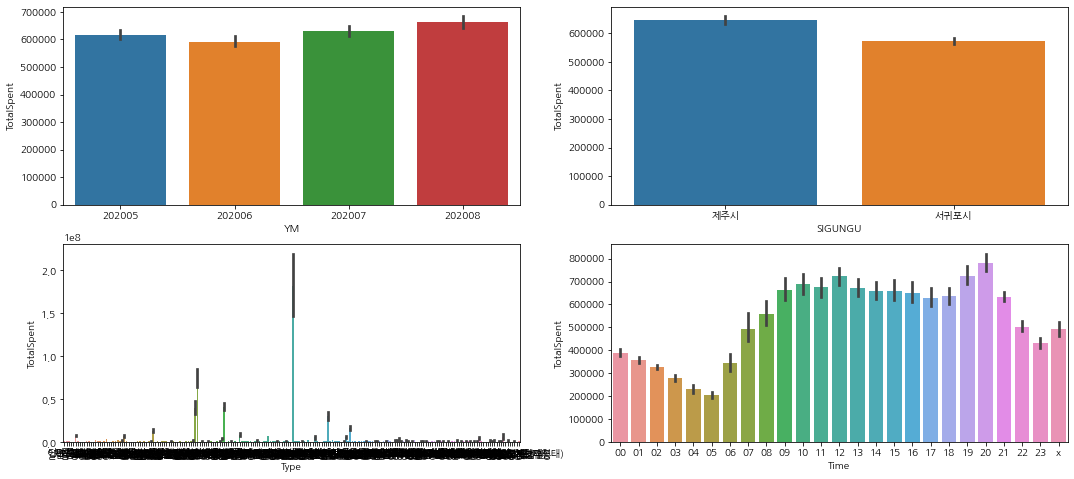

In [30]:
# 총사용금액으로 정리해보기

figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)

sns.barplot(data=df, x="YM", y="TotalSpent", ax=ax1)
sns.barplot(data=df, x="SIGUNGU", y="TotalSpent", ax=ax2)
sns.barplot(data=df, x="Type", y="TotalSpent", ax=ax3)
sns.barplot(data=df, x="Time", y="TotalSpent", ax=ax4)



In [278]:
# 총사용금액은 7,8월은 휴가시즌, 5월은 가정의 달이라 높은 것 같음

# 저녁시간에 사용금액이 더 많다.

In [279]:
df_si_tot = pd.DataFrame(df.groupby('SIGUNGU')['TotalSpent'].sum())
df_si_tot.reset_index(inplace=True)
df_si_tot['pop'] = df_si_tot['SIGUNGU'].map({'제주시':492072, '서귀포시':181929})
df_si_tot['Mean'] = round(df_si_tot['TotalSpent']/df_si_tot['pop'],0)
df_si_tot

,SIGUNGU,TotalSpent,pop,Mean
0,서귀포시,184322022708,181929,1013154.0
1,제주시,515888007651,492072,1048399.0


In [280]:
# 1인당 총사용금액을 보면 비슷함

<AxesSubplot:xlabel='Time', ylabel='DisSpent'>

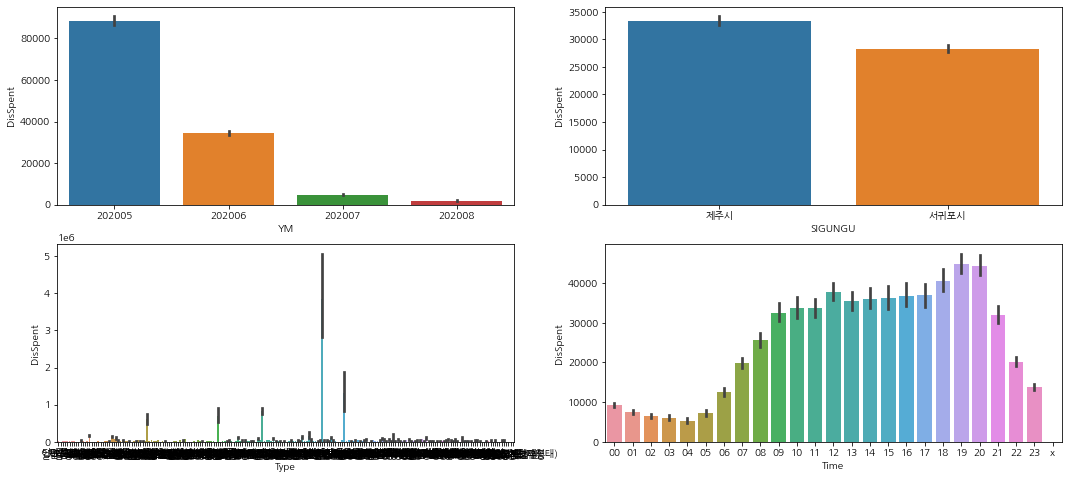

In [281]:
# 재난사용금액 그래프로 그려보기

figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)

sns.barplot(data=df, x="YM", y="DisSpent", ax=ax1)
sns.barplot(data=df, x="SIGUNGU", y="DisSpent", ax=ax2)
sns.barplot(data=df, x="Type", y="DisSpent", ax=ax3)
sns.barplot(data=df, x="Time", y="DisSpent", ax=ax4)

In [282]:
# 재난지원금 5월에 많고 떨어진다(5월에 받아서...)
# 제주시가 더 많이 소비(하지만 1인당으로 치면 서귀포시가 높다)
# 시간별 소비는 재난지원금이나 총사용금액이나 비슷함

<AxesSubplot:xlabel='Time', ylabel='TotalSpent'>

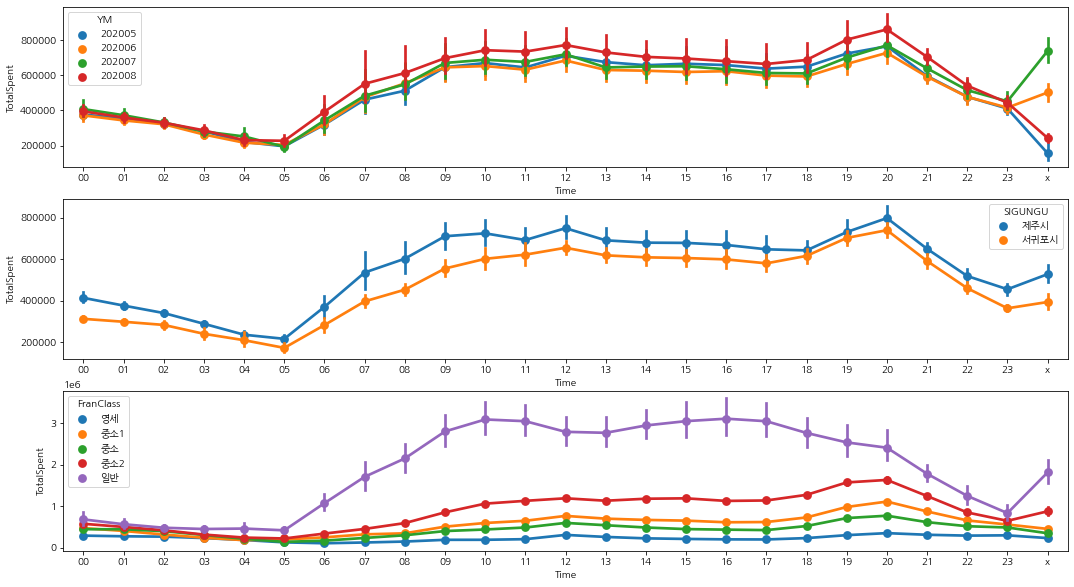

In [283]:
# 시간대별로 총사용금액 비교해보기

fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,10)

sns.pointplot(data=df, x="Time", y="TotalSpent",hue='YM', ax=ax1)
sns.pointplot(data=df, x="Time",y= df["TotalSpent"], hue="SIGUNGU", ax=ax2)
# sns.pointplot(data=df, x="Time", y="TotalSpent", hue="Type", ax=ax3)
sns.pointplot(data=df, x="Time", y="TotalSpent", hue="FranClass", ax=ax3)


In [284]:
# 일반에서 떨어질때 다른 곳이 오름 점심 시간을 피해서 장을 보러가는게(마트) 아닐까?
# 식사시간에 사용금액이 많다

In [285]:
df_si_dis = pd.DataFrame(df.groupby('SIGUNGU')['DisSpent'].sum())
df_si_dis.reset_index(inplace=True)
df_si_dis['pop'] = df_si_dis['SIGUNGU'].map({'제주시':492072, '서귀포시':181929})
df_si_dis['Mean'] = round(df_si_dis['DisSpent']/df_si_dis['pop'],0)
df_si_dis

# 1인당 사용금액은 받는 사람들 마다 금액이 틀린데 이 분석은 아닌것 같긴하지만

,SIGUNGU,DisSpent,pop,Mean
0,서귀포시,9092931318,181929,49981.0
1,제주시,26643435679,492072,54145.0


In [286]:
pivot_df_tot = pd.pivot_table(df,'TotalSpent','Type', 'Time', 'count'  )
pivot_df_tot


Time,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,x
Type,,,,,,,,,,,,,,,,,,,,,,,,,
1급호텔,6.0,3.0,4.0,6.0,5.0,3.0,7.0,12.0,11.0,11.0,8.0,12.0,13.0,14.0,14.0,15.0,15.0,16.0,14.0,15.0,16.0,16.0,13.0,11.0,1.0
2급호텔,29.0,28.0,23.0,17.0,15.0,8.0,16.0,16.0,18.0,21.0,22.0,23.0,22.0,22.0,27.0,30.0,30.0,38.0,42.0,48.0,45.0,41.0,32.0,35.0,4.0
CATV,nan,nan,nan,nan,nan,nan,nan,nan,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,1.0,nan,nan,nan,nan,1.0
DVD음반테이프판매,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.0,1.0,3.0,11.0,10.0,11.0,11.0,12.0,9.0,7.0,8.0,7.0,1.0,nan,nan,9.0
LPG,43.0,25.0,21.0,22.0,26.0,77.0,161.0,363.0,436.0,493.0,515.0,489.0,438.0,484.0,484.0,480.0,486.0,483.0,411.0,278.0,158.0,124.0,96.0,59.0,273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
화랑,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.0,6.0,8.0,9.0,17.0,13.0,9.0,9.0,6.0,9.0,5.0,6.0,3.0,2.0,nan,4.0
화물운송,17.0,16.0,13.0,7.0,5.0,8.0,18.0,43.0,81.0,94.0,106.0,101.0,78.0,102.0,109.0,103.0,100.0,82.0,63.0,37.0,36.0,26.0,16.0,19.0,6.0
화방표구점,nan,nan,nan,nan,nan,nan,nan,nan,1.0,7.0,12.0,13.0,9.0,12.0,12.0,12.0,11.0,18.0,6.0,3.0,2.0,nan,nan,nan,3.0


In [31]:
# 오전 10시에 일반이 가장 높은 이유는 뭐지?
frand_df = df[df['FranClass']=='일반'].groupby(['Time','Type'])['TotalSpent'].sum()
frand_df=pd.DataFrame(frand_df).sort_values('TotalSpent', ascending=False)
frand_df.reset_index(inplace=True)
frand_df
frand_df[frand_df['Time']=='17'].head(10)
# 면세점,마트(sum)
# 일반한식,마트(count)
# 주유소(관광객들이 많으니깐?)

,Time,Type,TotalSpent
1,17,슈퍼마켓,3513963903
5,17,면세점,2916795642
16,17,농축협직영매장,2297488453
22,17,주유소,2155223130
36,17,골프경기장,1905948523
42,17,대형할인점,1787452730
83,17,농협하나로클럽,982203990
109,17,특급호텔,664049305
124,17,인터넷Mall,593339440
135,17,일반한식,550520595


<AxesSubplot:xlabel='Time', ylabel='DisSpent'>

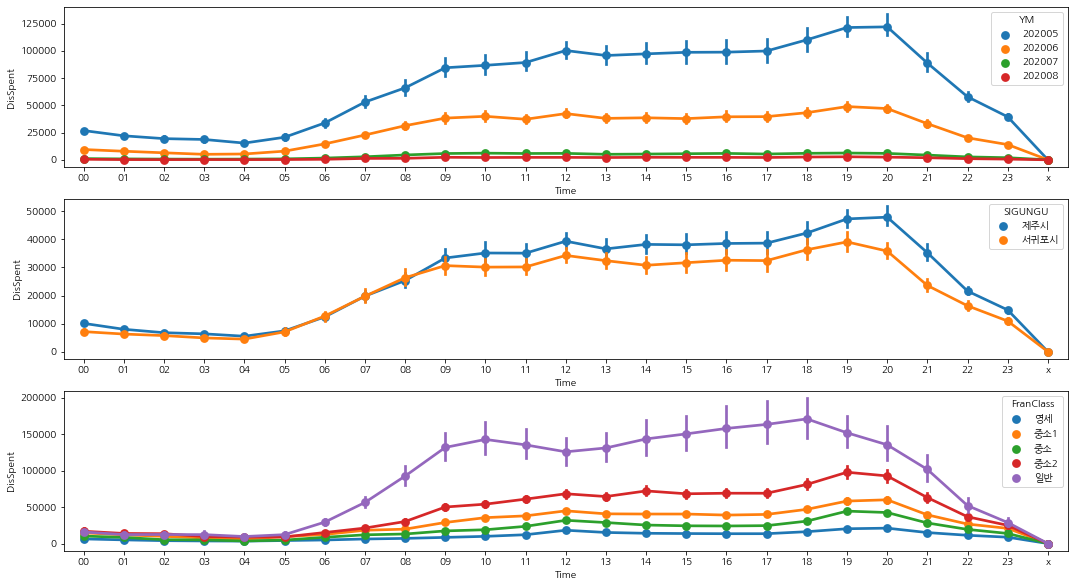

In [288]:
# 재난지원금 사용 그래프로 비교해보기
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,10)


sns.pointplot(data=df, x="Time", y="DisSpent",hue='YM', ax=ax1)
sns.pointplot(data=df, x="Time",y= df["DisSpent"], hue="SIGUNGU", ax=ax2)
# sns.pointplot(data=df, x="Time", y="TotalSpent", hue="Type", ax=ax3)

sns.pointplot(data=df, x="Time", y="DisSpent", hue="FranClass", ax=ax3)

In [289]:

# 일반도 재난지원금이 사용 가능하군

In [30]:
# 10/18시에 (재난 지원금)장보러 많이 감_비슷한 패턴
ds_fran_df = df[df['FranClass']=='일반'].groupby(['Time','Type'])['DisSpent'].sum()
ds_frand_df=pd.DataFrame(ds_fran_df).sort_values('DisSpent', ascending=False)
ds_frand_df.reset_index(inplace=True)
ds_frand_df[ds_frand_df['Time']=='19'].head(5)

,Time,Type,DisSpent
4,19,슈퍼마켓,312379349
16,19,농축협직영매장,198970015
43,19,일반한식,102417147
48,19,농협하나로클럽,86548712
51,19,주유소,75466767


In [25]:
# 10/18시에 (재난 지원금)장보러 많이 감_비슷한 패턴
ds_fran_df = df[df['FranClass']=='일반'].groupby(['Time','Type'])['DisSpent'].sum()
ds_frand_df=pd.DataFrame(ds_fran_df).sort_values('DisSpent', ascending=False)
ds_frand_df.reset_index(inplace=True)
ds_frand_df[ds_frand_df['Time']=='19'].head(5)

,Time,Type,DisSpent
4,19,슈퍼마켓,312379349
16,19,농축협직영매장,198970015
43,19,일반한식,102417147
48,19,농협하나로클럽,86548712
51,19,주유소,75466767


In [27]:
ds_frand_df2 = df[df['FranClass']=='중소2'].groupby(['Time','Type'])['DisSpent'].sum()
ds_frand_df2=pd.DataFrame(ds_frand_df2).sort_values('DisSpent', ascending=False)
ds_frand_df2.reset_index(inplace=True)
ds_frand_df2[ds_frand_df2['Time']=='19'].head(15)


,Time,Type,DisSpent
0,19,일반한식,113888333
4,19,슈퍼마켓,83557010
27,19,스포츠레져용품,36835900
62,19,편의점,17954670
68,19,서양음식,14734765
73,19,주유소,13431457
92,19,일식회집,10893080
106,19,안경,9691540
148,19,기타잡화,7123454
151,19,약국,6958030


<AxesSubplot:xlabel='Time', ylabel='NumofSpent'>

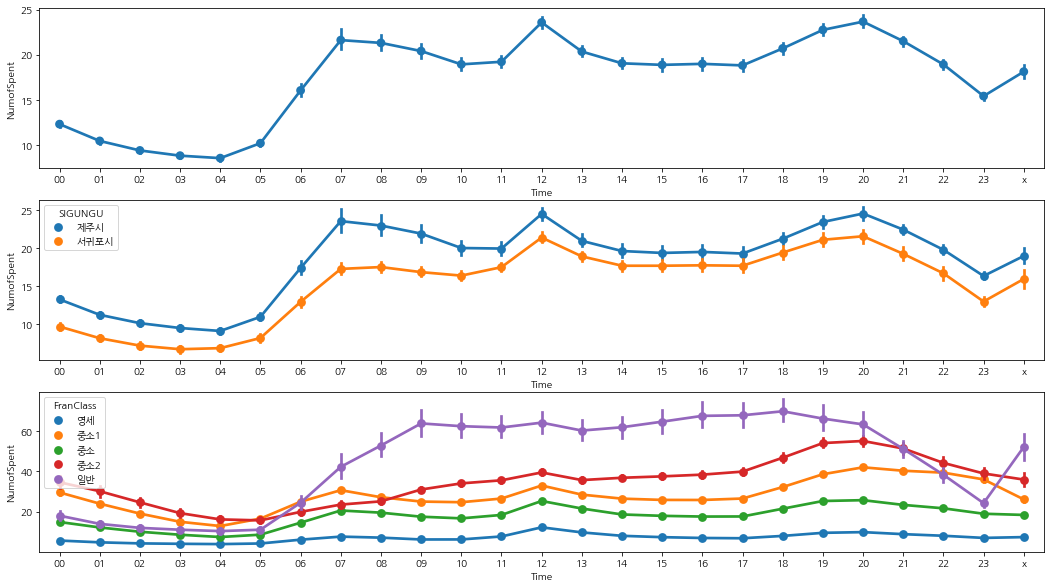

In [292]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,10)

sns.pointplot(data=df, x="Time", y="NumofSpent", ax=ax1)

sns.pointplot(data=df, x="Time",y= "NumofSpent", hue="SIGUNGU", ax=ax2)

# sns.pointplot(data=df, x="Time", y="TotalSpent", hue="Type", ax=ax3)

sns.pointplot(data=df, x="Time", y="NumofSpent", hue="FranClass", ax=ax3)




<AxesSubplot:xlabel='Time', ylabel='NumofDisSpent'>

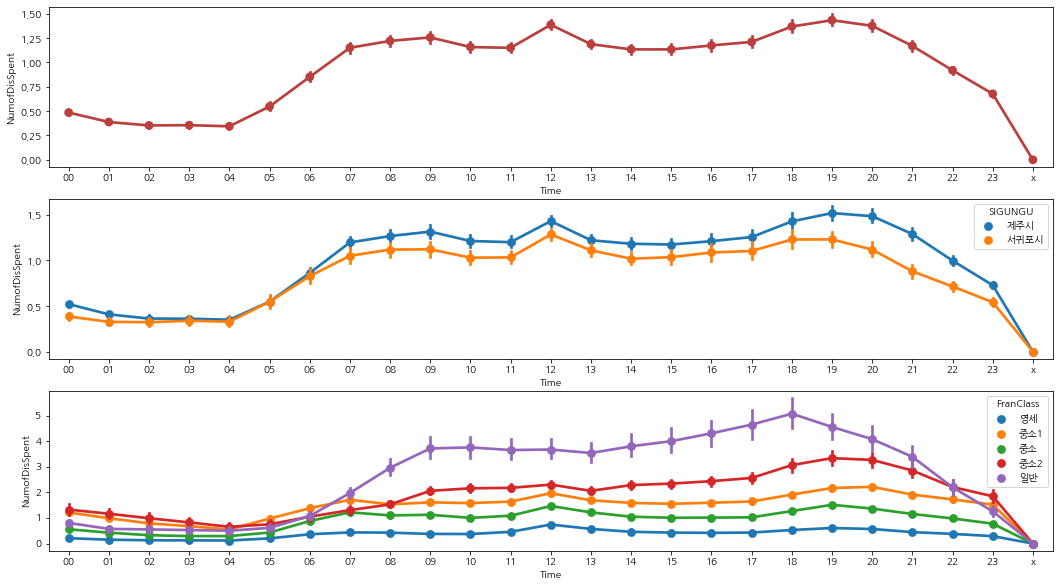

In [293]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,10)


sns.pointplot(data=df, x="Time", y="NumofDisSpent", ax=ax1,color="#bb3f3f")

sns.pointplot(data=df, x="Time",y= "NumofDisSpent", hue="SIGUNGU", ax=ax2)
# sns.pointplot(data=df, x="Time", y="TotalSpent", hue="Type", ax=ax3)


sns.pointplot(data=df, x="Time", y="NumofDisSpent", hue="FranClass", ax=ax3)


In [294]:
# 역시 식사를 하는 시간에 많이 소비하고 횟수도 증가함

In [295]:
df_06=df[df['YM']==202006]
df_07=df[df['YM']==202007]
df_08=df[df['YM']==202008]
df_05=df[df['YM']==202005]

<AxesSubplot:xlabel='Time', ylabel='DisSpent'>

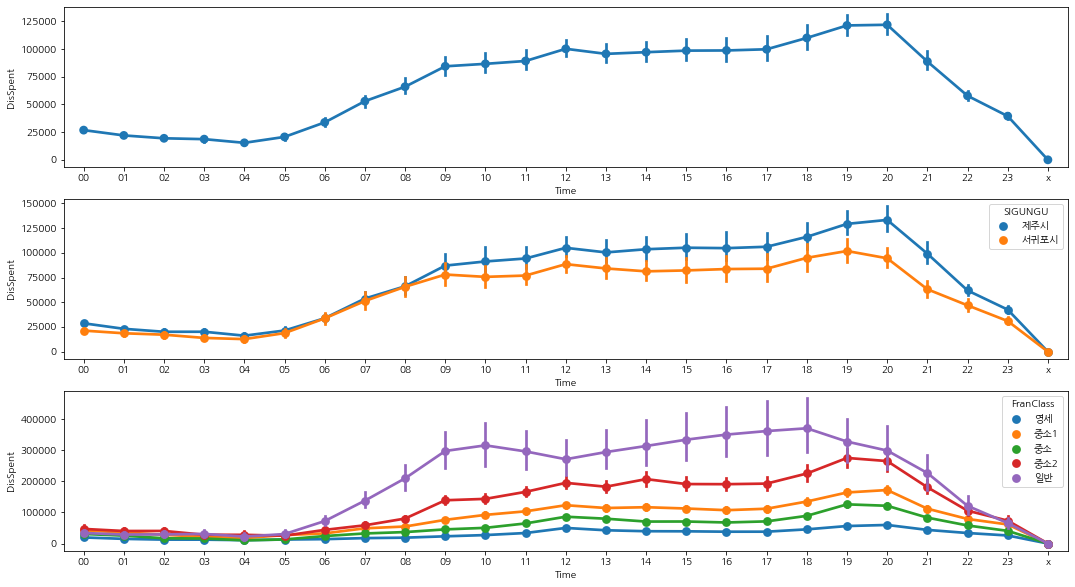

In [296]:
# 5월 그래프만 따로 분석해보기
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,10)


sns.pointplot(data=df_05, x="Time", y="DisSpent", ax=ax1)
sns.pointplot(data=df_05, x="Time",y= "DisSpent", hue="SIGUNGU", ax=ax2)
# sns.pointplot(data=df, x="Time", y="TotalSpent", hue="Type", ax=ax3)

sns.pointplot(data=df_05, x="Time", y="DisSpent", hue="FranClass", ax=ax3)

In [297]:
# 재난지원금이 일반매장에서도 많이 사용되었음
# 하나로클럽은 대형마트(?)지만 재난지원금 사용이 되어서 많이 사용하는 것 같음
# 언제든지 시간대별로 총재난지원금 사용금액은 슈퍼마켓, 농축협직영매장, 농협하나로클럽, 주유소가 상위권을 차지함

In [298]:
df_05_pivot = df_05.pivot_table('DisSpent', 'Type', 'Time', np.sum)
pd.options.display.max_columns = len(df_05_pivot.columns)

df_05_pivot

Time,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,x
Type,,,,,,,,,,,,,,,,,,,,,,,,,
1급호텔,0.0,0.0,nan,0.0,0.0,0.0,14000.0,9900.0,162000.0,0.0,0.0,0.0,0.0,100000.0,0.0,100000.0,17000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan
2급호텔,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,35000.0,50000.0,0.0,165000.0,20000.0,224300.0,61500.0,128500.0,0.0,172000.0,0.0,0.0,289000.0,51000.0,0.0,90000.0,0.0
CATV,nan,nan,nan,nan,nan,nan,nan,nan,0.0,2146220.0,136160.0,123740.0,0.0,450330.0,26080.0,68720.0,251760.0,139680.0,47730.0,33600.0,nan,nan,nan,nan,nan
DVD음반테이프판매,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,72000.0,154000.0,126000.0,57000.0,71000.0,31000.0,565000.0,34000.0,48000.0,0.0,nan,nan,nan
LPG,155030.0,199744.0,30000.0,0.0,90492.0,637763.0,1899861.0,7038504.0,11733929.0,13848860.0,16908028.0,15126851.0,12280666.0,15225799.0,16235038.0,15913334.0,15345356.0,14552767.0,12872966.0,6796752.0,4174774.0,2936493.0,1516473.0,303522.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
화랑,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,10000.0,0.0,120000.0,180000.0,20000.0,135000.0,0.0,23000.0,0.0,0.0,9000.0,0.0,nan,nan,nan
화물운송,37000.0,3300.0,307000.0,0.0,0.0,0.0,2271248.0,841080.0,482350.0,874660.0,1739780.0,1509760.0,1656370.0,1635900.0,679390.0,2902990.0,1665300.0,178800.0,1074000.0,28600.0,3300.0,44640.0,77100.0,46640.0,0.0
화방표구점,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,140000.0,678480.0,366000.0,0.0,100000.0,0.0,160000.0,0.0,nan,nan,150000.0,nan,nan,nan,nan


In [28]:
def df_time(a,b,c):
    """a는 Type 중 하나를 입력
    b는 DisSpent or TotalSpent
    c는 시간을 문자열로"""
    df_temp= df[df['FranClass']==a].groupby(['Time','Type'])[b].sum()
    df_temp=pd.DataFrame(df_temp).sort_values(b, ascending=False)
    df_temp.reset_index(inplace=True)
    return df_temp[df_temp['Time']==c].reset_index().head(15)

In [29]:
# 전체 시간별, Type별 상위 15개 총사용금액을 보여줌  
df_total=[]
for i in range(24):
    if i < 10:
        i= '0'+ str(i)
        df_temp = df_time('일반', 'TotalSpent', i)
        df_total.append(df_temp)
    else:
        df_temp = df_time('일반', 'TotalSpent', str(i))
        df_total.append(df_temp)

pd.options.display.max_columns = len(pd.concat(df_total, axis=1).drop(['index'], axis=1).columns)    
pd.concat(df_total, axis=1).drop(['index'], axis=1)

,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent
0,00,인터넷Mall,240513708,01,유흥주점,141732541,02,유흥주점,109104233,03,유흥주점,82123440,04,주유소,67780498,05,주유소,142229957,06,주유소,576510055,07,주유소,1187374114,08,주유소,1638749784,09,주유소,1897625470,10,면세점,2042548965,11,면세점,2323183870,12,면세점,2819389960,13,면세점,2710893593,14,면세점,2820576875,15,면세점,3255753865,16,면세점,3566947245,17,슈퍼마켓,3513963903,18,슈퍼마켓,3404391992,19,슈퍼마켓,2695438479,20,슈퍼마켓,2178100054,21,슈퍼마켓,1788309214,22,슈퍼마켓,1147458777,23,인터넷Mall,409874427
1,00,항공사,207568300,01,인터넷Mall,134106140,02,일반한식,62478306,03,슈퍼마켓,40874620,04,유흥주점,49341750,05,콘도,51709954,06,면세점,374592550,07,면세점,1048981340,08,면세점,1357449480,09,슈퍼마켓,1691175703,10,슈퍼마켓,2035149974,11,주유소,2006790439,12,골프경기장,2173541576,13,슈퍼마켓,2253334859,14,슈퍼마켓,2571540635,15,슈퍼마켓,2901242363,16,슈퍼마켓,3358047871,17,면세점,2916795642,18,면세점,2368435390,19,면세점,2334286847,20,면세점,1922705276,21,대형할인점,1230357130,22,대형할인점,744883620,23,슈퍼마켓,390206895
2,00,일반한식,138687540,01,항공사,101958200,02,인터넷Mall,51352731,03,주유소,37352377,04,콘도,40147111,05,슈퍼마켓,49116390,06,골프경기장,327035360,07,슈퍼마켓,517127430,08,슈퍼마켓,973719164,09,면세점,1689285439,10,주유소,2002868805,11,슈퍼마켓,1989893604,12,슈퍼마켓,2027344294,13,주유소,2044855411,14,주유소,2110007687,15,주유소,2120249848,16,주유소,2179376296,17,농축협직영매장,2297488453,18,농축협직영매장,2201327840,19,일반한식,1683854610,20,일반한식,1834075409,21,일반한식,1063636495,22,인터넷Mall,504076981,23,항공사,300504944
3,00,유흥주점,137742623,01,일반한식,95902576,02,슈퍼마켓,51274880,03,일반한식,36504560,04,슈퍼마켓,35392200,05,유흥주점,35388000,06,슈퍼마켓,125220980,07,골프경기장,486028093,08,농축협직영매장,535898508,09,종합병원,1123267880,10,종합병원,1734857960,11,종합병원,1501366561,12,주유소,1917755350,13,골프경기장,1861359929,14,농축협직영매장,1570916671,15,농축협직영매장,1786973112,16,농축협직영매장,2066114416,17,주유소,2155223130,18,주유소,1948148027,19,농축협직영매장,1662807450,20,대형할인점,1384870530,21,농축협직영매장,602696640,22,항공사,425365456,23,일반한식,238253371
4,00,편의점,101902310,01,슈퍼마켓,72569350,02,단란주점,47534000,03,콘도,30285456,04,종합병원,23003030,05,편의점,28145340,06,화물운송,115070640,07,콘도,177330220,08,종합병원,436501790,09,농축협직영매장,969396584,10,농축협직영매장,1289913129,11,골프경기장,1402932788,12,일반한식,1321209966,13,대형할인점,1338434320,14,대형할인점,1528453520,15,대형할인점,1727411440,16,대형할인점,1806708670,17,골프경기장,1905948523,18,대형할인점,1597892070,19,대형할인점,1424748940,20,농축협직영매장,1224768010,21,주유소,568669054,22,일반한식,407309164,23,편의점,182517078
5,00,슈퍼마켓,101505600,01,단란주점,72062623,02,항공사,40334400,03,편의점,28209100,04,일반한식,20112550,05,인터넷Mall,24885807,06,콘도,94380349,07,편의점,121164180,08,콘도,395021305,09,콘도,741956078,10,콘도,1175447683,11,농축협직영매장,1293302021,12,대형할인점,1241251830,13,농축협직영매장,1316302592,14,골프경기장,1093914137,15,농협하나로클럽,892175870,16,골프경기장,1070914234,17,대형할인점,1787452730,18,골프경기장,1578041424,19,주유소,1328256199,20,주유소,866954093,21,편의점,519653351,22,편의점,319044700,23,유흥주점,136125800
6,00,단란주점,66436700,01,편의점,65575670,02,편의점,39572480,03,항공사,25883500,04,인터넷Mall,19368562,05,종합병원,22111280,06,특급호텔,61084014,07,특급호텔,103627521,08,골프경기장,332189806,09,약국,568008308,10,특급호텔,864428032,11,대형할인점,1114305690,12,농축협직영매장,1187242348,13,일반한식,1238897900,14,일반한식,901088247,15,특급호텔,770928220,16,농협하나로클럽,948704700,17,농협하나로클럽,982203990,18,일반한식,1048881082,19,농협하나로클럽,683889190,20,편의점,561890220,21,인터넷Mall,476498233,22,주유소,218218870,23,주유소,100445883
7,00,기타숙박업,64158917,01,주점,37400900,02,종합병원,39089240,03,인터넷Mall,25088233,04,편의점,19199840,05,항공사,21371400,06,편의점,60045010,07,기타건축자재,101451607,08,농협하나로클럽,249346080,09,농협하나로클럽,559816760,10,약국,688270509,11,콘도,1014255083,12,농협하나로클럽,660970410,13,농협하나로클럽,695344960,14,특급호텔,879329118,15,인터넷Mall,734197312,16,특급호텔,672896730,17,특급호텔,664049305,18,농협하나로클럽,877695300,19,골프경기장,580515140,20,농협하나로

In [32]:
# 전체 시간별, Type별 상위 15개 총사용금액을 보여줌  (일반업종/재난지원금)
df_total=[]
for i in range(24):
    if i < 10:
        i= '0'+ str(i)
        df_temp = df_time('일반', 'DisSpent', i)
        df_total.append(df_temp)
    else:
        df_temp = df_time('일반', 'DisSpent', str(i))
        df_total.append(df_temp)

pd.options.display.max_columns = len(pd.concat(df_total, axis=1).drop(['index'], axis=1).columns)    
pd.concat(df_total, axis=1).drop(['index'], axis=1)

,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent
0,00,일반한식,8022350,01,일반한식,5347260,02,슈퍼마켓,4219676,03,슈퍼마켓,3559150,04,슈퍼마켓,2663452,05,주유소,3809348,06,주유소,30571008,07,주유소,67201977,08,주유소,95417791,09,슈퍼마켓,131772632,10,슈퍼마켓,186880586,11,슈퍼마켓,209093673,12,슈퍼마켓,210827865,13,슈퍼마켓,241937926,14,슈퍼마켓,273048374,15,슈퍼마켓,315102258,16,슈퍼마켓,362993020,17,슈퍼마켓,402341390,18,슈퍼마켓,398284475,19,슈퍼마켓,312379349,20,슈퍼마켓,249410562,21,슈퍼마켓,206281132,22,슈퍼마켓,117591058,23,슈퍼마켓,35609766
1,00,슈퍼마켓,6348840,01,슈퍼마켓,4901476,02,일반한식,3141494,03,일반한식,2528960,04,대형할인점,1295350,05,슈퍼마켓,3500585,06,슈퍼마켓,9850880,07,슈퍼마켓,39309725,08,슈퍼마켓,77480363,09,농축협직영매장,123026304,10,농축협직영매장,173656042,11,농축협직영매장,181768630,12,농축협직영매장,177685366,13,농축협직영매장,185740831,14,농축협직영매장,213046699,15,농축협직영매장,237849049,16,농축협직영매장,266716671,17,농축협직영매장,280701578,18,농축협직영매장,278845296,19,농축협직영매장,198970015,20,농축협직영매장,146502198,21,농축협직영매장,74408388,22,일반한식,24894935,23,일반한식,15473445
2,00,편의점,4908687,01,편의점,3110880,02,편의점,2114230,03,편의점,1544310,04,편의점,1254650,05,편의점,2068583,06,편의점,3745354,07,농축협직영매장,8972840,08,농축협직영매장,60091735,09,주유소,120738935,10,주유소,127860213,11,주유소,124658778,12,주유소,114726796,13,주유소,127978311,14,주유소,140847027,15,주유소,136225006,16,농협하나로클럽,133727820,17,농협하나로클럽,143786348,18,농협하나로클럽,125409437,19,일반한식,102417147,20,일반한식,112819315,21,일반한식,56056335,22,편의점,15740246,23,편의점,8254400
3,00,대형할인점,3022150,01,대형할인점,1482831,02,종합병원,1998450,03,대형할인점,1502230,04,일반한식,912100,05,종합병원,1361540,06,화물운송,2683298,07,편의점,6804188,08,농협하나로클럽,26496240,09,농협하나로클럽,62649634,10,농협하나로클럽,93406102,11,농협하나로클럽,101622332,12,농협하나로클럽,98602056,13,농협하나로클럽,105409843,14,농협하나로클럽,121593727,15,농협하나로클럽,126885900,16,주유소,132932542,17,주유소,131720733,18,주유소,116622966,19,농협하나로클럽,86548712,20,농협하나로클럽,75311572,21,농협하나로클럽,49999093,22,주유소,7876490,23,서양음식,5080980
4,00,서양음식,2785800,01,종합병원,1273880,02,대형할인점,1629250,03,서양음식,906400,04,종합병원,713090,05,대형할인점,1313780,06,종합병원,1881660,07,비료농약사료종자,4797654,08,종합병원,23394005,09,종합병원,58874374,10,종합병원,83677217,11,종합병원,68715227,12,일반한식,72592470,13,일반한식,64428350,14,종합병원,41762210,15,종합병원,33581754,16,대형할인점,30580780,17,대형할인점,34839068,18,일반한식,54899838,19,주유소,75466767,20,주유소,47746730,21,주유소,31404937,22,대형할인점,7713190,23,스넥,3829820
5,00,스넥,1652450,01,서양음식,1107070,02,주점,596200,03,종합병원,839930,04,주유소,260600,05,LPG,609784,06,LPG,1767705,07,농협하나로클럽,4636840,08,비료농약사료종자,14057562,09,약국,27548198,10,약국,37749628,11,약국,34297297,12,종합병원,26968282,13,서양음식,21546214,14,일반한식,34716008,15,약국,28867208,16,스포츠레져용품,28780290,17,편의점,25604398,18,대형할인점,29963740,19,편의점,27897653,20,편의점,33101014,21,편의점,24684676,22,스넥,6369530,23,대형할인점,3799630
6,00,종합병원,1583000,01,주점,904170,02,서양음식,544840,03,주점,217300,04,LPG,121587,05,일반한식,572070,06,대형할인점,1621090,07,LPG,4249957,08,편의점,8421061,09,비료농약사료종자,13464840,10,농축수산품,16256779,11,일반한식,24849912,12,서양음식,23152051,13,종합병원,21285890,14,약국,32356985,15,대형할인점,26426251,16,편의점,25812972,17,일반한식,23563926,18,편의점,29614862,19,대형할인점,25077686,20,대형할인점,22655876,21,대형할인점,14060220,22,서양음식,5934514,23,종합병원,2427440
7,00,주점,1249290,01,스넥,353200,02,화물운송,280000,03,기타숙박업,70000,04,서양음식,79190,05,화물운송,236220,06,비료농약사료종자,1082900,07,농축수산품,3014300,08,기타농업관련,7845562,09,기타농업관련,12486447,10,대형할인점,14690504,11,농축수산품,17518620,12,약국,21795419,13,스포츠레져용품,21185584,14,스포츠레져용품,23083380,15,스포츠레져용품,24838487,16,약국,24258100,17,스포츠레져용품,20387900,18,스포츠레져용품,23977720,19,스포츠레져용품,20197371,20,스포츠레져용품,21125980,21,서양음식,11271150,22,일식회집,2311700,23,주유소,2203896
8,00,주유소,828200,01,일식회집,318000,02,종합용역,210000,03,기타레져업,64500,04,기타레져업,41500,05,서양음식,81900,06,일반한식,957979,07,기타건축자재,2874045,08,LPG,6902559,09,정육점,12012230,10,정육점,14002986,11,대형할인점,17219060,12,편의점,19469675,13,편의점,20476340,14,대형할인

In [301]:
def df_05_time(a,b,c):
    """a는 Type 중 하나를 입력
    b는 DisSpent or TotalSpent
    c는 시간을 문자열로"""
    df= df_05[df_05['FranClass']==a].groupby(['Time','Type'])[b].sum()
    df=pd.DataFrame(df).sort_values(b, ascending=False)
    df.reset_index(inplace=True)
    return df[df['Time']==c].reset_index().head(15)

In [338]:
# 5월 시간별, Type별 상위 15개 재난지원금 총사용금액을 보여줌  
df_total=[]
for i in range(24):
    if i < 10:
        i = '0' + str(i)
        df_temp_05 = df_05_time('일반', 'DisSpent', i)
        df_total.append(df_temp_05)
    else:
        df_temp_05 = df_05_time('일반', 'DisSpent', str(i))
        df_total.append(df_temp_05)
pd.options.display.max_columns = len(pd.concat(df_total, axis=1).drop(['index'], axis=1).columns)    
pd.concat(df_total, axis=1).drop(['index'], axis=1)
 

,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent
0,00,일반한식,6228260,01,일반한식,4225990,02,슈퍼마켓,2716856,03,일반한식,2375400,04,슈퍼마켓,1398250,05,주유소,2586780,06,주유소,20067696,07,주유소,42369212,08,주유소,58214873,09,슈퍼마켓,86379040,10,슈퍼마켓,121146968,11,슈퍼마켓,140693968,12,슈퍼마켓,138044332,13,슈퍼마켓,164914286,14,슈퍼마켓,183335396,15,슈퍼마켓,213901534,16,슈퍼마켓,239168915,17,슈퍼마켓,268049993,18,슈퍼마켓,266858324,19,슈퍼마켓,207632790,20,슈퍼마켓,161801788,21,슈퍼마켓,134136768,22,슈퍼마켓,78579453,23,슈퍼마켓,23799490
1,00,슈퍼마켓,3468580,01,슈퍼마켓,2748720,02,일반한식,2458730,03,슈퍼마켓,2187050,04,대형할인점,1004650,05,슈퍼마켓,2037440,06,슈퍼마켓,6163680,07,슈퍼마켓,27583720,08,슈퍼마켓,52579452,09,주유소,82941746,10,농축협직영매장,101974539,11,농축협직영매장,110167231,12,농축협직영매장,108702833,13,농축협직영매장,120177630,14,농축협직영매장,131862400,15,농축협직영매장,150410751,16,농축협직영매장,169568153,17,농축협직영매장,182140772,18,농축협직영매장,177635138,19,농축협직영매장,127310903,20,농축협직영매장,95223627,21,농축협직영매장,48010040,22,일반한식,18924935,23,일반한식,12042990
2,00,편의점,2994933,01,편의점,2173620,02,편의점,1637100,03,대형할인점,1480340,04,일반한식,775100,05,편의점,1222080,06,편의점,2434080,07,농축협직영매장,5128020,08,농축협직영매장,32764289,09,농축협직영매장,72402766,10,주유소,88565476,11,주유소,85891142,12,주유소,76990084,13,주유소,85271632,14,주유소,96579793,15,주유소,95116878,16,주유소,91109300,17,농협하나로클럽,95140610,18,농협하나로클럽,85842392,19,일반한식,70199131,20,일반한식,78186899,21,일반한식,41102158,22,편의점,11370610,23,편의점,5883440
3,00,대형할인점,2582820,01,대형할인점,1261491,02,대형할인점,1531790,03,편의점,1108200,04,편의점,763590,05,대형할인점,1184880,06,화물운송,2271248,07,편의점,4204430,08,농협하나로클럽,17500040,09,농협하나로클럽,38144260,10,농협하나로클럽,58346760,11,농협하나로클럽,63907072,12,농협하나로클럽,60454500,13,농협하나로클럽,69572624,14,농협하나로클럽,76601460,15,농협하나로클럽,83606591,16,농협하나로클럽,89927500,17,주유소,89184465,18,주유소,76378981,19,농협하나로클럽,54068639,20,농협하나로클럽,54226889,21,농협하나로클럽,33976120,22,대형할인점,5722200,23,서양음식,3561020
4,00,서양음식,2035570,01,서양음식,895900,02,종합병원,1179600,03,서양음식,867700,04,종합병원,432220,05,종합병원,1021960,06,대형할인점,1436440,07,비료농약사료종자,3633594,08,종합병원,13969885,09,종합병원,34419080,10,종합병원,48900216,11,종합병원,42390727,12,일반한식,44374660,13,일반한식,41489017,14,종합병원,24623595,15,종합병원,20305492,16,대형할인점,21998850,17,대형할인점,25409620,18,일반한식,38987445,19,주유소,48251745,20,주유소,31255442,21,주유소,20974892,22,주유소,5064036,23,대형할인점,3017370
5,00,스넥,1106270,01,종합병원,888360,02,주점,350500,03,종합병원,575810,04,주유소,240600,05,일반한식,539730,06,종합병원,1081570,07,LPG,2980525,08,비료농약사료종자,8301242,09,약국,14045844,10,약국,23022288,11,약국,21625222,12,서양음식,16424845,13,스포츠레져용품,17520540,14,일반한식,23920448,15,스포츠레져용품,19542787,16,스포츠레져용품,21926480,17,편의점,18081353,18,대형할인점,21272960,19,편의점,19309480,20,편의점,23501650,21,편의점,16562030,22,스넥,4581070,23,스넥,2539540
6,00,주점,865380,01,주점,790670,02,서양음식,349900,03,주점,101500,04,LPG,51633,05,LPG,413982,06,비료농약사료종자,1027400,07,농협하나로클럽,2933870,08,편의점,5515370,09,정육점,10313900,10,농축수산품,10627016,11,일반한식,17580690,12,종합병원,14329749,13,서양음식,15542822,14,약국,19847446,15,대형할인점,18577932,16,편의점,18121450,17,일반한식,17452870,18,편의점,20642880,19,대형할인점,18468585,20,대형할인점,16955460,21,대형할인점,10783220,22,서양음식,4022030,23,주유소,1494638
7,00,종합병원,732820,01,일식회집,285000,02,화물운송,280000,03,기타숙박업,70000,04,당구장,35000,05,서양음식,63300,06,일반한식,901129,07,기타건축자재,2385282,08,LPG,3880727,09,기타농업관련,7841312,10,정육점,10444550,11,대형할인점,12364640,12,편의점,13540026,13,대형할인점,13690260,14,스포츠레져용품,18875490,15,약국,17238040,16,농축수산품,16038710,17,스포츠레져용품,16176050,18,스포츠레져용품,18532040,19,스포츠레져용품,16788390,20,스포츠레져용품,16448210,21,서양음식,7622380,22,일식회집,1906500,23,종합병원,1457090
8,00,주유소,519000,01,스넥,274900,02,종합용역,210000,03,기타레져업,64500,04,기타레져업,20700,05,수영장,47810,06,LPG,824584,07,건강진단,1904760,08,기타농업관련,3742252,09,비료농약사료종자,7189528,10,대형할인점,9717050,11,정육점,12294270,12,약국,13288780,13,편의점,13604970,14,대형할인점,17672672,15,정장,16584450,16,약국,15445

In [339]:
df_05_time('영세', 'DisSpent', '09')

,index,Time,Type,DisSpent
0,48,09,일반한식,19893046
1,132,09,농축수산품,8969994
2,197,09,편의점,6386375
3,210,09,슈퍼마켓,5810870
4,270,09,약국,4129450
5,297,09,제과점,3685510
6,318,09,서양음식,3283280
7,342,09,정육점,2991600
8,382,09,스포츠레져용품,2574500
9,426,09,자동차정비,2199400


In [304]:
# 5월 시간별로 이것저것 보기 
ds_df05 = df_05[df_05['FranClass']=='일반'].groupby(['Time','Type'])['DisSpent'].sum()
ds_df05=pd.DataFrame(ds_df05).sort_values('DisSpent', ascending=False)
ds_df05.reset_index(inplace=True)
ds_df05[ds_df05['Time']=='10'].head(15)

,Time,Type,DisSpent
17,10,슈퍼마켓,121146968
21,10,농축협직영매장,101974539
29,10,주유소,88565476
46,10,농협하나로클럽,58346760
51,10,종합병원,48900216
71,10,약국,23022288
147,10,농축수산품,10627016
149,10,정육점,10444550
155,10,대형할인점,9717050
170,10,편의점,7765223


In [305]:
#소상공인으로 나눠본 재난지원금 총액
df_05[df_05['FranClass'] == '일반'].groupby('Type')['DisSpent'].sum().sort_values(ascending=False).head(10)

Type
슈퍼마켓       2529326793
농축협직영매장    1634812442
주유소        1099068411
농협하나로클럽     884332317
일반한식        460430802
종합병원        244996172
편의점         240489495
대형할인점       227762533
약국          173470820
스포츠레져용품     173182423
Name: DisSpent, dtype: int64

In [306]:
df_06[df_06['FranClass'] == '일반'].groupby('Type')['DisSpent'].sum().sort_values(ascending=False).head(10)

Type
슈퍼마켓       1079738454
농축협직영매장     783851940
주유소         467722674
농협하나로클럽     395740026
일반한식        185392667
종합병원        143556009
편의점          95355939
약국           89569948
대형할인점        69767485
서양음식         59244263
Name: DisSpent, dtype: int64

In [307]:
df_07[df_07['FranClass'] == '일반'].groupby('Type')['DisSpent'].sum().sort_values(ascending=False).head(10)

Type
슈퍼마켓        143772674
농축협직영매장     137152441
주유소          54557085
농협하나로클럽      54016081
종합병원         21082190
약국           13088116
일반한식         12611890
대형할인점        11081082
편의점           7355578
비료농약사료종자      5946278
Name: DisSpent, dtype: int64

In [308]:
df_08[df_08['FranClass'] == '일반'].groupby('Type')['DisSpent'].sum().sort_values(ascending=False).head(10)

Type
농축협직영매장    53810409
슈퍼마켓       52550292
농협하나로클럽    22080222
주유소        15750881
일반한식        7280674
농축수산품       4786170
약국          4757709
편의점         3699441
대형할인점       3689310
종합병원        3676771
Name: DisSpent, dtype: int64

In [309]:
# 5월 전체 재난사용금액 상위 10
df_05.groupby('Type')['DisSpent'].sum().sort_values(ascending=False).head(10)

Type
일반한식       4126868796
슈퍼마켓       3486887062
농축협직영매장    1634812442
편의점        1376116129
주유소        1318824231
스포츠레져용품    1041489757
농협하나로클럽     884332317
서양음식        686173008
약국          647366839
정장          494491401
Name: DisSpent, dtype: int64

In [310]:
#일단 5월이든 전체든 구매패턴은 비슷함(5월 하드캐리하니깐)

In [311]:
# 코로나데이터 일자별로 나온건 아니라 한달이라 붙이기가 애매하군
# Type 분류해서 합쳐야 함
# x시는 어떻게 처리할 것 인가?